C:\Users\zaid.n.ansari\AppData\Local\Temp\ipykernel_7872\3912583710.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_flown'] = pd.to_datetime(df['date_flown'], errors='coerce')


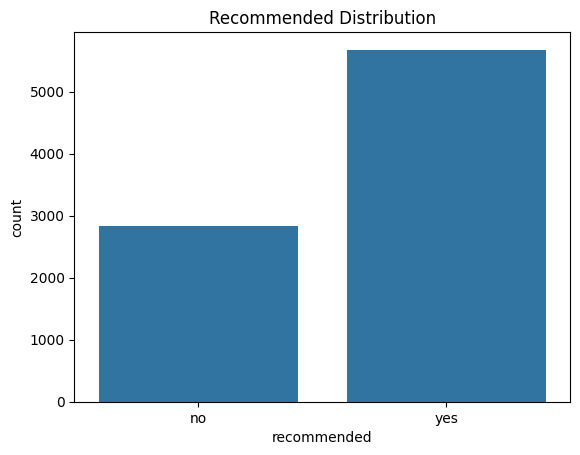

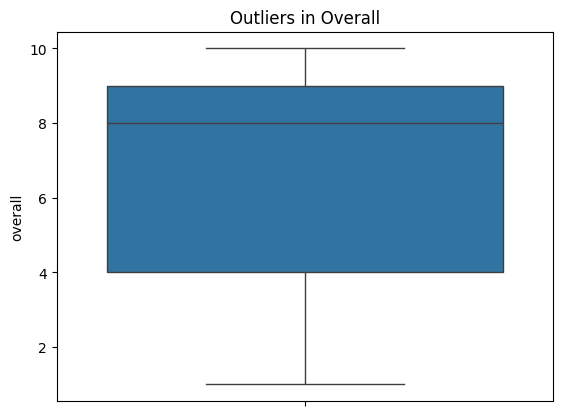


Logistic Regression:
Accuracy: 0.9388954171562868
Precision: 0.9439252336448598
Recall: 0.9669277632724108
F1 Score: 0.9552880481513327
Cross-Val Score: 0.9440607619351582

Decision Tree:
Accuracy: 0.917743830787309
Precision: 0.9360414866032843
Recall: 0.9425587467362925
F1 Score: 0.9392888117953165
Cross-Val Score: 0.9252581083498959

Random Forest:
Accuracy: 0.9394829612220916
Precision: 0.9532062391681109
Recall: 0.9573542210617929
F1 Score: 0.9552757273122015
Cross-Val Score: 0.9401834546762083

Support Vector Machine:
Accuracy: 0.9347826086956522
Precision: 0.9398305084745763
Recall: 0.9651871192341166
F1 Score: 0.9523400601116359
Cross-Val Score: 0.9433556399739974

K-Nearest Neighbors:
Accuracy: 0.9294947121034077
Precision: 0.9349112426035503
Recall: 0.9625761531766753
F1 Score: 0.9485420240137221
Cross-Val Score: 0.9290178377134899


In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# 2. Load Dataset
df = pd.read_csv('https://raw.githubusercontent.com/rahulinchal/SPPU/refs/heads/main/Data/updated_Airline_data.csv')

# 3. Data Cleaning
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df['review_date'] = pd.to_datetime(df['review_date'], errors='coerce')
df['date_flown'] = pd.to_datetime(df['date_flown'], errors='coerce')

# 4. EDA (optional visualization)
sns.countplot(x='recommended', data=df)
plt.title("Recommended Distribution")
plt.show()

# 5. Outlier Treatment (visual)
sns.boxplot(df['overall'])
plt.title("Outliers in Overall")
plt.show()

# 6. Log Transform (if skewed)
df['overall'] = np.log1p(df['overall'])

# 7. Feature Engineering
df = pd.get_dummies(df, columns=['traveller_type', 'cabin'], drop_first=True)

# 8. Features and Target
features = ['overall', 'food_bev', 'ground_service', 'value_for_money'] + \
           [col for col in df.columns if 'traveller_type_' in col or 'cabin_' in col] #use cabin_ to select dummy columns
X = df[features]
y = df['recommended']

# 9. Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 10. Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 11. Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("\nLogistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr,pos_label='yes'))
print("Recall:", recall_score(y_test, y_pred_lr,pos_label='yes'))
print("F1 Score:", f1_score(y_test, y_pred_lr,pos_label='yes'))
print("Cross-Val Score:", np.mean(cross_val_score(lr, X, y, cv=5)))

# 12. Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("\nDecision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt,pos_label='yes'))
print("Recall:", recall_score(y_test, y_pred_dt,pos_label='yes'))
print("F1 Score:", f1_score(y_test, y_pred_dt,pos_label='yes'))
print("Cross-Val Score:", np.mean(cross_val_score(dt, X, y, cv=5)))

# 13. Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf,pos_label='yes'))
print("Recall:", recall_score(y_test, y_pred_rf,pos_label='yes'))
print("F1 Score:", f1_score(y_test, y_pred_rf,pos_label='yes'))
print("Cross-Val Score:", np.mean(cross_val_score(rf, X, y, cv=5)))

# 14. Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("\nSupport Vector Machine:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm,pos_label='yes'))
print("Recall:", recall_score(y_test, y_pred_svm,pos_label='yes'))
print("F1 Score:", f1_score(y_test, y_pred_svm,pos_label='yes'))
print("Cross-Val Score:", np.mean(cross_val_score(svm, X, y, cv=5)))

# 15. K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("\nK-Nearest Neighbors:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn,pos_label='yes'))
print("Recall:", recall_score(y_test, y_pred_knn,pos_label='yes'))
print("F1 Score:", f1_score(y_test, y_pred_knn,pos_label='yes'))
print("Cross-Val Score:", np.mean(cross_val_score(knn, X, y, cv=5)))